## Red Wine Quality

In [36]:
#load packages 
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,\
     precision_score, recall_score, classification_report

In [2]:
### load datasets
df=pd.read_csv("winequality-red.csv")

In [3]:
### First five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.rename(columns={'fixed acidity':'Fixed_Acidity','volatile acidity':'Volatile_Acidity',
                  'citric acid':'Citric_Acid','residual sugar':'Residual_Sugar',
                  'free sulfur dioxide':'Free_Sulfur_Dioxide', 'total sulfur dioxide':'Total_Sulfur_Dioxide',
                  }, inplace=True)

In [9]:
df.head(2)

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


---

### EDA

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

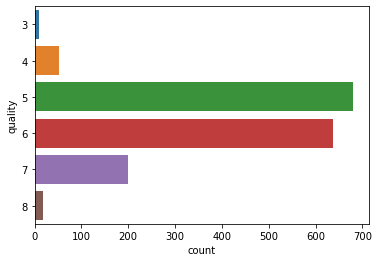

In [11]:
sns.countplot(y='quality', data=df);

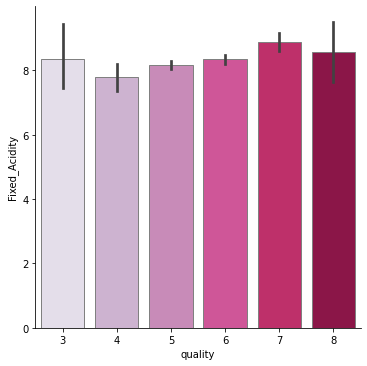

In [12]:
sns.catplot(x='quality', y='Fixed_Acidity', kind='bar', edgecolor='.5', palette='PuRd', data=df);

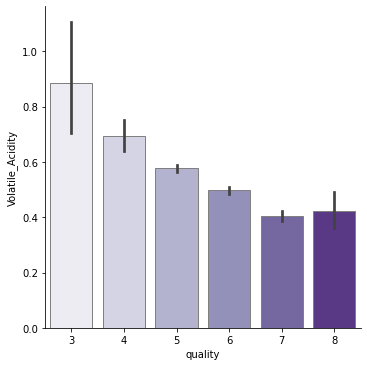

In [13]:
sns.catplot(x='quality', y='Volatile_Acidity', kind='bar', edgecolor='.5', palette='Purples', data=df);

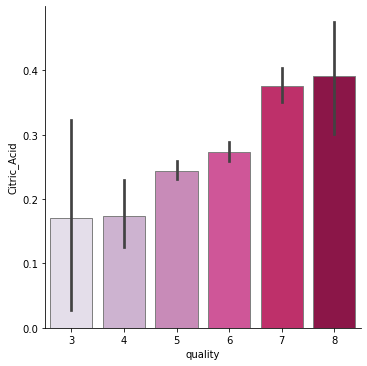

In [14]:
sns.catplot(x='quality', y='Citric_Acid', kind='bar', edgecolor='.5', palette='PuRd', data=df);

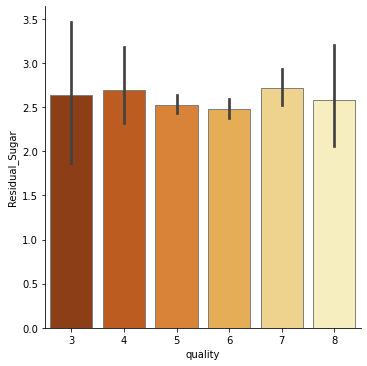

In [15]:
sns.catplot(x='quality', y='Residual_Sugar', kind='bar', edgecolor='.5', palette='YlOrBr_r', data=df);

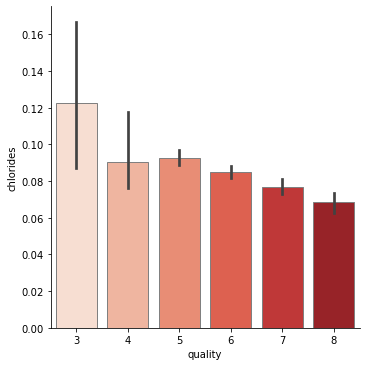

In [16]:
sns.catplot(x='quality', y='chlorides', kind='bar', edgecolor='.5', palette='Reds', data=df);

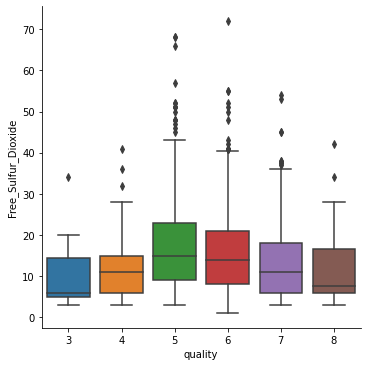

In [17]:
sns.catplot(x='quality', y='Free_Sulfur_Dioxide', kind='box', data=df);

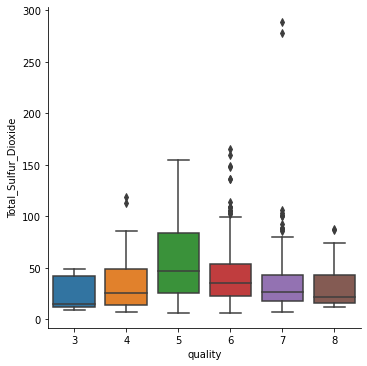

In [18]:
sns.catplot(x='quality', y='Total_Sulfur_Dioxide', kind='box', data=df);

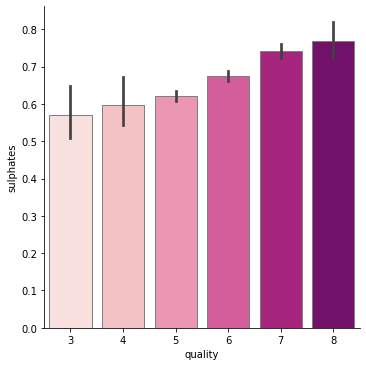

In [19]:
sns.catplot(x='quality', y='sulphates', kind='bar', edgecolor='.5', palette='RdPu', data=df);

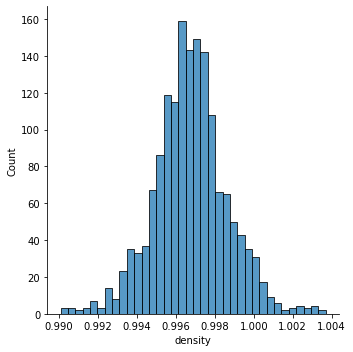

In [20]:
sns.displot(df['density']);

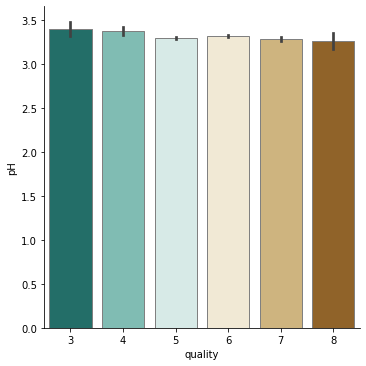

In [21]:
sns.catplot(x='quality', y='pH', kind='bar', edgecolor='.5', palette='BrBG_r', data=df);

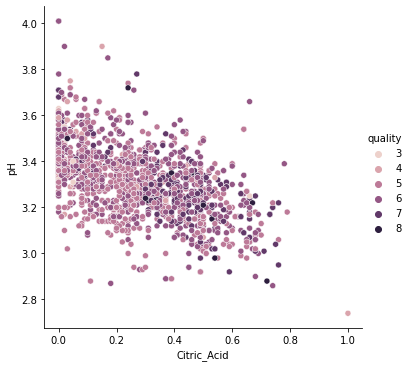

In [22]:
sns.relplot(x='Citric_Acid', y='pH',
            hue = 'quality', data=df);

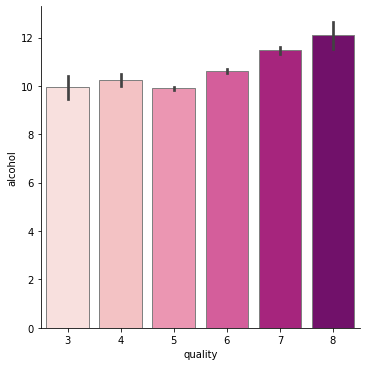

In [23]:
sns.catplot(x='quality', y='alcohol', kind='bar', edgecolor='.5', palette='RdPu', data=df);

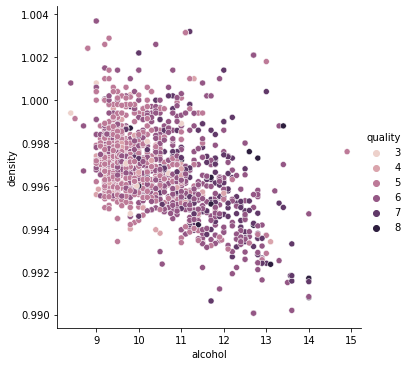

In [24]:
sns.relplot(x='alcohol', y='density', hue='quality', data=df);

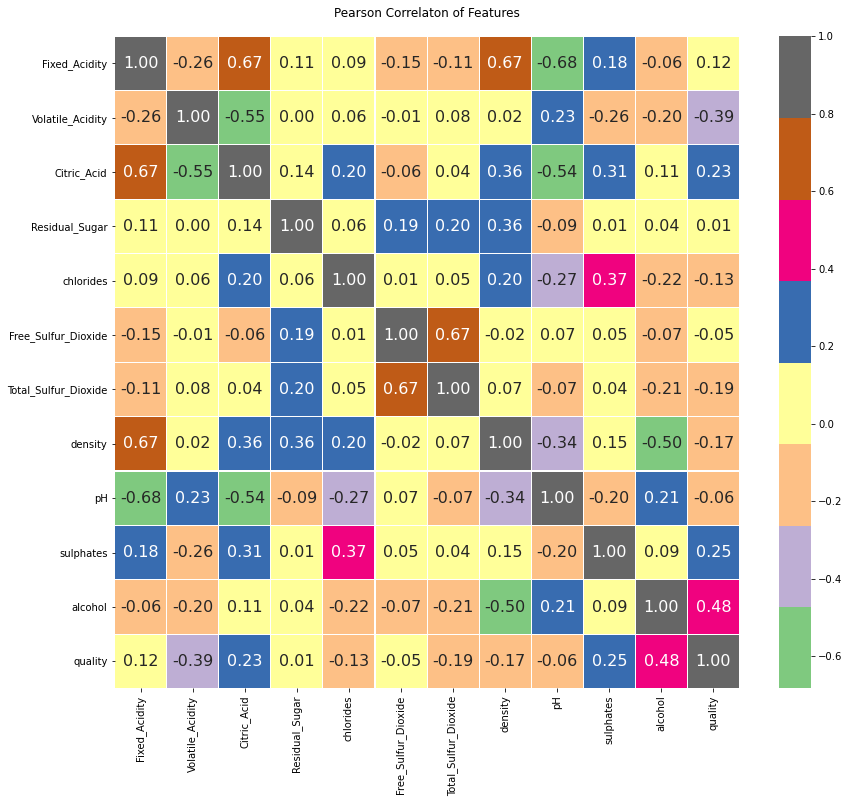

In [25]:
colormap = plt.cm.Accent
plt.figure(figsize=(14,12))
plt.title('Pearson Correlaton of Features', y=1.02)

# heatmap 
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0,
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16},fmt='.2f');

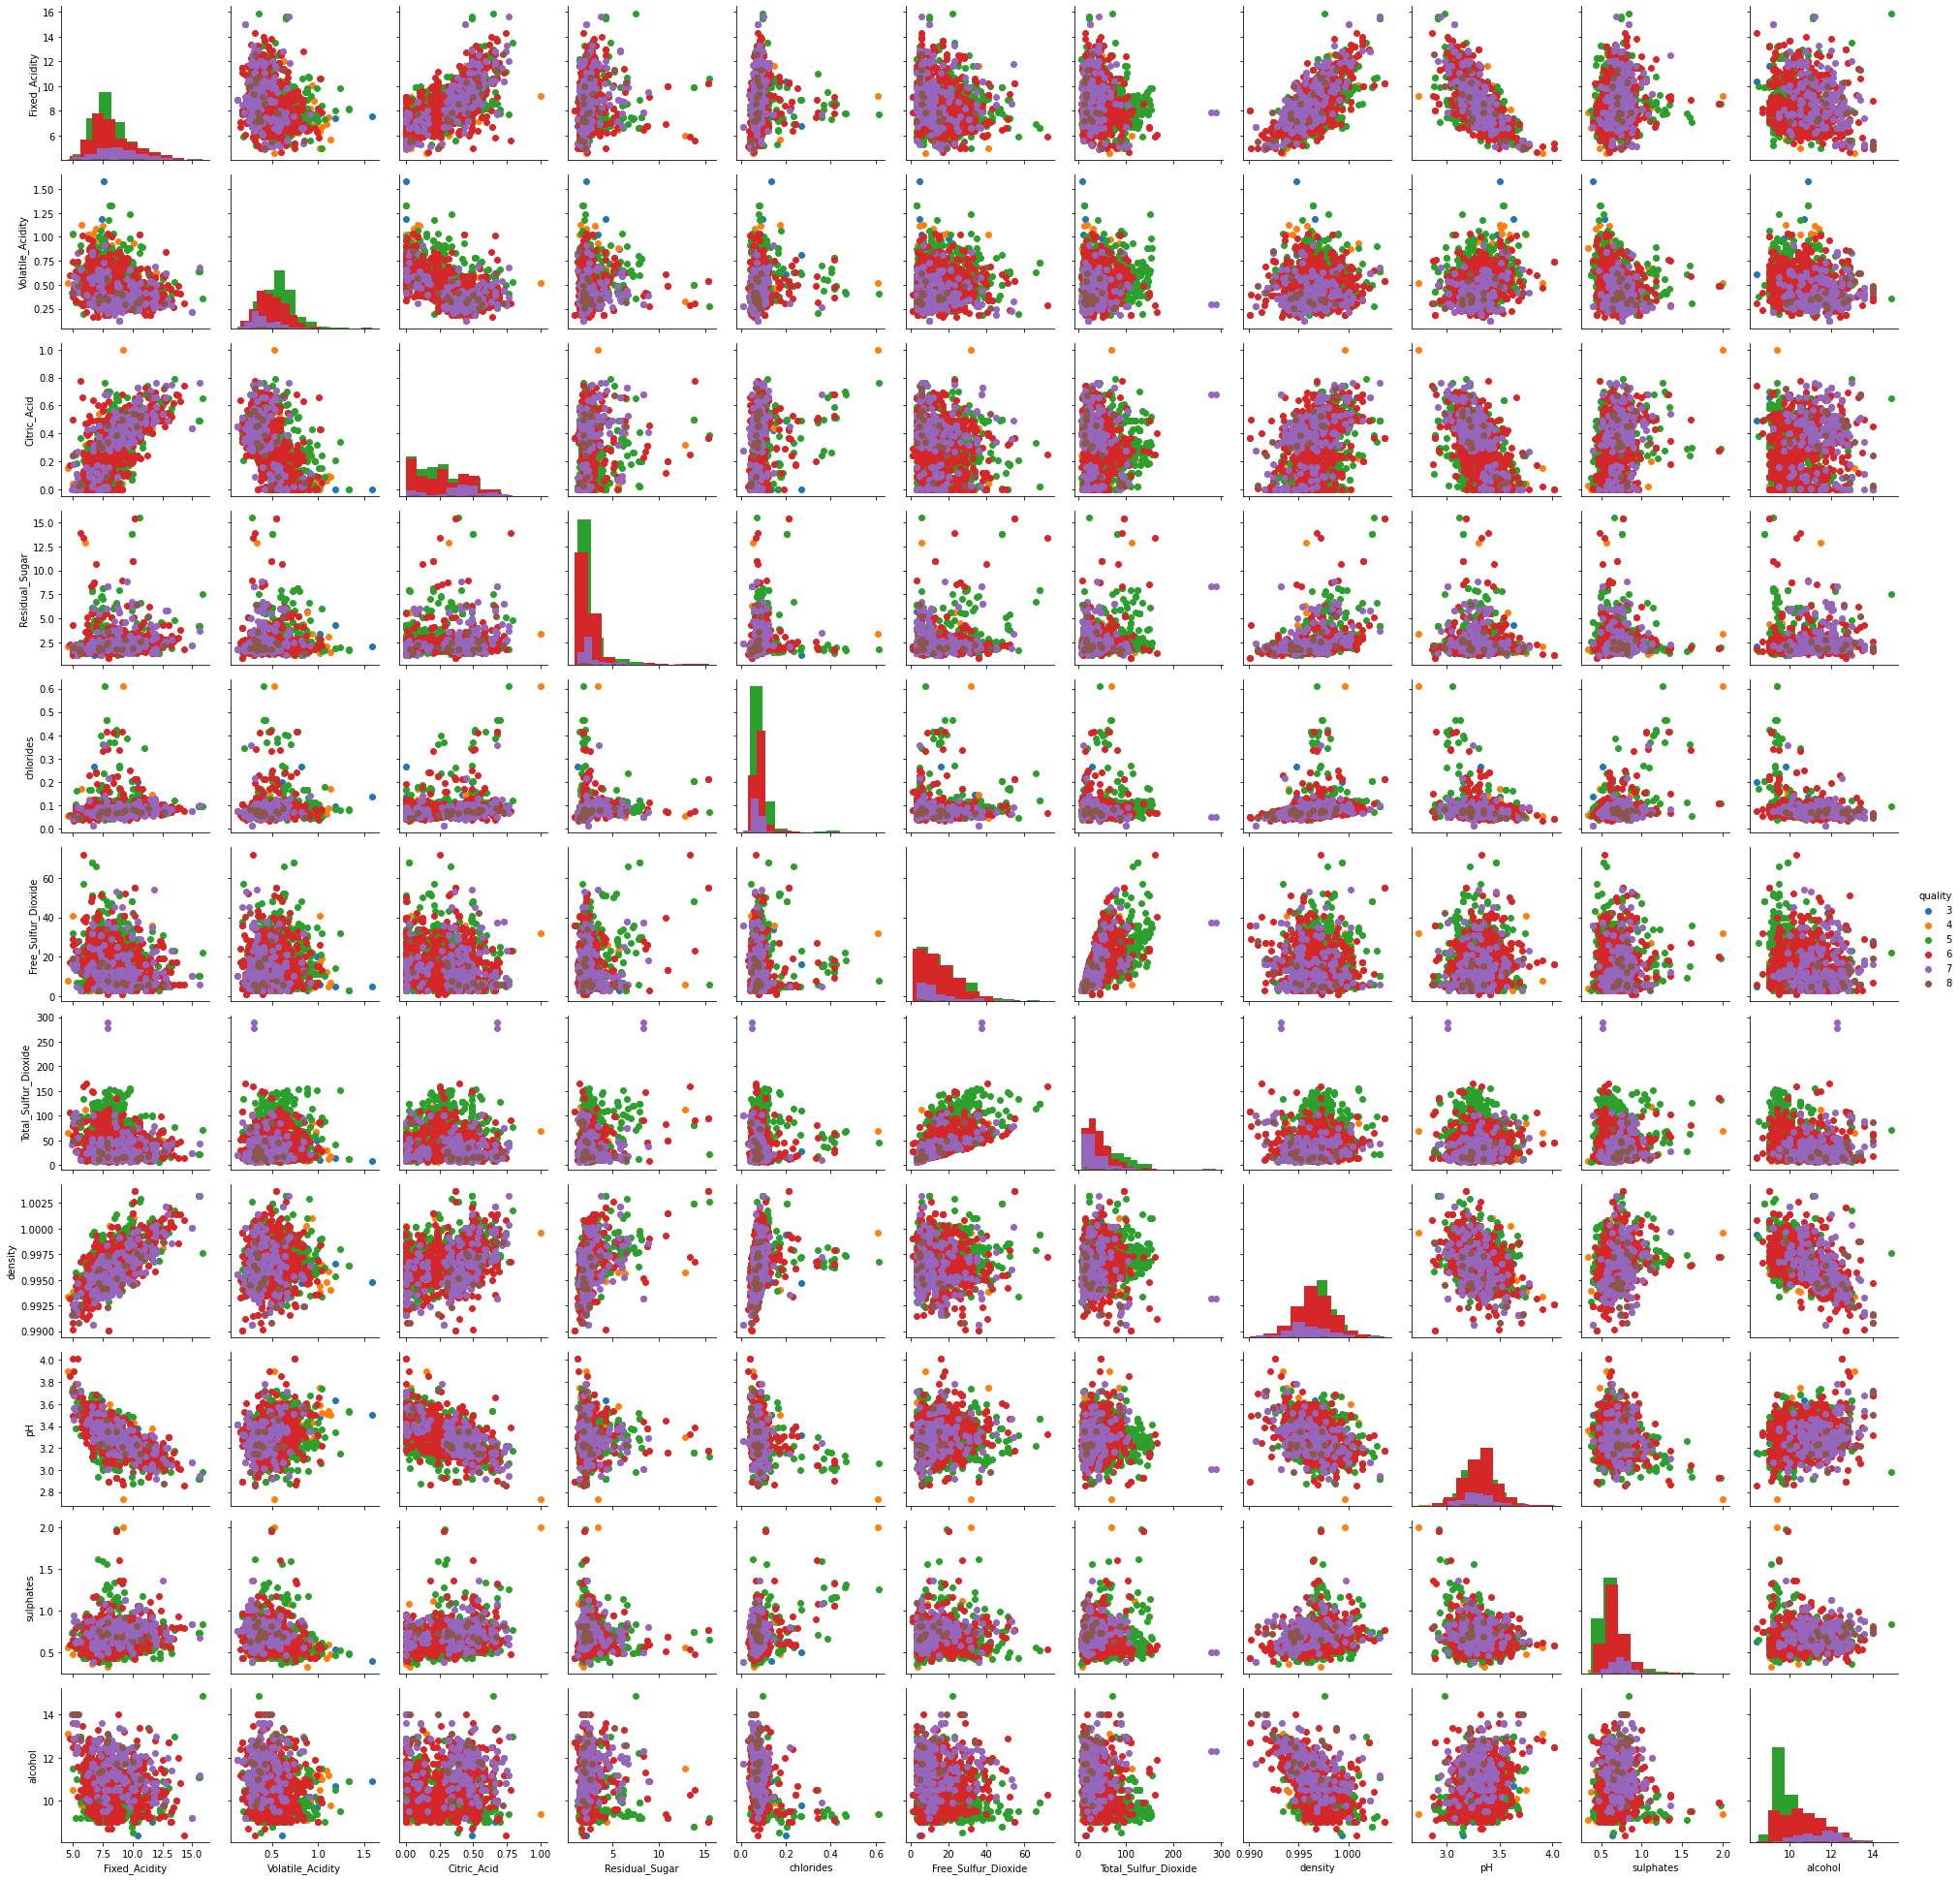

In [26]:
g = sns.PairGrid(df, hue='quality');
g.map_diag(plt.hist);  
g.map_offdiag(plt.scatter);
g.add_legend();

#### Feature engineering

In [27]:
my_bins = (2, 6.5, 8)
groups = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = my_bins, labels = groups)

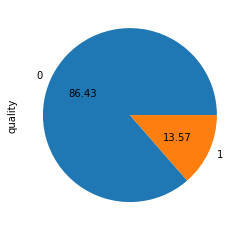

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality']= le.fit_transform(df['quality'])
df['quality'].value_counts().plot(kind = 'pie',autopct ='%.2f');

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df)

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.39625599],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.39625599],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.39625599],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988, -0.39625599],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.39625599],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988, -0.39625599]])

In [31]:
from sklearn.model_selection import train_test_split

y_train = df['quality']
df.drop(columns='quality', inplace=True)

In [32]:
X_train, X_val, y_tr, y_val = train_test_split(df, y_train,test_size = 0.25, random_state =42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
   

In [34]:
model_RF = RandomForestClassifier()


In [35]:
model_RF.fit(X_train, y_tr)
y_pred_RF = model_RF.predict(X_val) 

In [42]:
print(classification_report(y_val, y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.73      0.51      0.60        53

    accuracy                           0.91       400
   macro avg       0.83      0.74      0.77       400
weighted avg       0.90      0.91      0.90       400



In [43]:
featurelist = []
for name, score in zip(df.columns, model_RF.feature_importances_):
    featurelist.append(score *100)

pd.DataFrame({'columns':X_train.columns, 'feature importances':featurelist})

,columns,feature importances
0,Fixed_Acidity,7.005729
1,Volatile_Acidity,10.812286
2,Citric_Acid,8.717501
3,Residual_Sugar,6.988285
4,chlorides,7.441167
5,Free_Sulfur_Dioxide,6.303706
6,Total_Sulfur_Dioxide,8.767781
7,density,9.643532
8,pH,5.431699
9,sulphates,12.591525


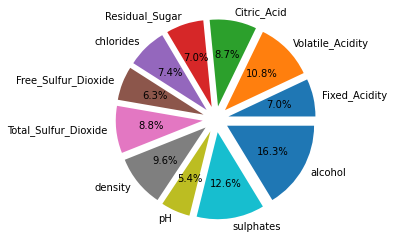

In [44]:
data = featurelist
explode = [0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15]
categories = df.columns
plt.pie(data, explode=explode, labels=categories, autopct='%0.1f%%');

In [47]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_tr)
y_pred_XGB = model_XGB.predict(X_val)

In [48]:
print(classification_report(y_val, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       347
           1       0.69      0.62      0.65        53

    accuracy                           0.91       400
   macro avg       0.82      0.79      0.80       400
weighted avg       0.91      0.91      0.91       400



In [49]:
rc = pd.DataFrame({'columns':X_train.columns, 'feature importances':featurelist})
rc.sort_values(by='feature importances', ascending=False)

,columns,feature importances
10,alcohol,16.296789
9,sulphates,12.591525
1,Volatile_Acidity,10.812286
7,density,9.643532
6,Total_Sulfur_Dioxide,8.767781
2,Citric_Acid,8.717501
4,chlorides,7.441167
0,Fixed_Acidity,7.005729
3,Residual_Sugar,6.988285
5,Free_Sulfur_Dioxide,6.303706
